In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [6]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("NYC_Taxi_Duration_Prediction")

<Experiment: artifact_location=('/Users/yogeshhasabe/Yogesh Hasabe '
 'Workspace/MLOps_ZoomCamp/02-experiment-tracking/mlruns/1'), creation_time=1716547624736, experiment_id='1', last_update_time=1716547624736, lifecycle_stage='active', name='NYC_Taxi_Duration_Prediction', tags={}>

In [7]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)


In [8]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [9]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.838799799829445

/var/folders/s2/dh1psyvd14d2q6k6svdplqf40000gn/T/ipykernel_2030/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/s2/dh1psyvd14d2q6k6svdplqf40000gn/T/ipykernel_2030/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

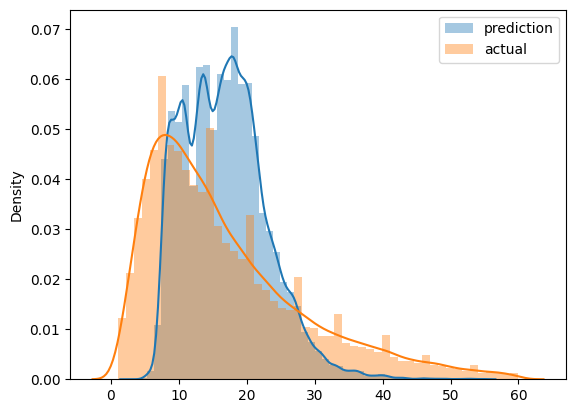

In [10]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [11]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [12]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [13]:

len(df_train), len(df_val)

(73908, 61921)

In [14]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [15]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [16]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.758715208946364

In [18]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [19]:
with mlflow.start_run():

    mlflow.set_tag("developer", "yogesh")

    mlflow.log_param("train_data_path", "./data/green_tripdata_2021-01.parquet")
    mlflow.log_param("val_data_path", "./data/green_tripdata_2021-02.parquet")

    alpha=0.1
    mlflow.log_param("alpha", alpha)

    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse_lasso = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("RMSE", rmse_lasso)

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
import xgboost as xgb

In [20]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [21]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [22]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [26]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[0]	validation-rmse:10.67948                          
[1]	validation-rmse:9.54383                           
[2]	validation-rmse:8.71560                           
[3]	validation-rmse:8.12278                           
[4]	validation-rmse:7.70102                           
[5]	validation-rmse:7.40483                           
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:44:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[6]	validation-rmse:7.19666                           
[7]	validation-rmse:7.05096                           
[8]	validation-rmse:6.94862                           
[9]	validation-rmse:6.87552                           
[10]	validation-rmse:6.81991                          
[11]	validation-rmse:6.78010                          
[12]	validation-rmse:6.75138                          
[13]	validation-rmse:6.72935                          
[14]	validation-rmse:6.71112                          
[15]	validation-rmse:6.69814                          
[16]	validation-rmse:6.68663                          
[17]	validation-rmse:6.67900                          
[18]	validation-rmse:6.67309                          
[19]	validation-rmse:6.66677                          
[20]	validation-rmse:6.66298                          
[21]	validation-rmse:6.66045                          
[22]	validation-rmse:6.65875                          
[23]	validation-rmse:6.65664                          
[24]	valid

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:45:04] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.35707                                                    
[1]	validation-rmse:7.92381                                                    
[2]	validation-rmse:7.25153                                                    
[3]	validation-rmse:6.91605                                                    
[4]	validation-rmse:6.75864                                                    
[5]	validation-rmse:6.67647                                                    
[6]	validation-rmse:6.62156                                                    
[7]	validation-rmse:6.59119                                                    
[8]	validation-rmse:6.57475                                                    
[9]	validation-rmse:6.56161                                                    
[10]	validation-rmse:6.55422                                                   
[11]	validation-rmse:6.54871                                                   
[12]	validation-rmse:6.54578            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:45:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.25876                                                   
[1]	validation-rmse:10.45019                                                   
[2]	validation-rmse:9.76790                                                    
[3]	validation-rmse:9.19666                                                    
[4]	validation-rmse:8.71923                                                    
[5]	validation-rmse:8.32282                                                    
[6]	validation-rmse:7.99791                                                    
[7]	validation-rmse:7.73126                                                    
[8]	validation-rmse:7.51074                                                    
[9]	validation-rmse:7.33142                                                    
[10]	validation-rmse:7.18344                                                   
[11]	validation-rmse:7.06415                                                   
[12]	validation-rmse:6.96549            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:45:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.34257                                                   
[1]	validation-rmse:10.59391                                                   
[2]	validation-rmse:9.95221                                                    
[3]	validation-rmse:9.40507                                                    
[4]	validation-rmse:8.94069                                                    
[5]	validation-rmse:8.54844                                                    
[6]	validation-rmse:8.21815                                                    
[7]	validation-rmse:7.94044                                                    
[8]	validation-rmse:7.70810                                                    
[9]	validation-rmse:7.51422                                                    
[10]	validation-rmse:7.35219                                                   
[11]	validation-rmse:7.21815                                                   
[12]	validation-rmse:7.10688            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:46:25] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.77917                                                    
[1]	validation-rmse:6.79406                                                    
[2]	validation-rmse:6.57386                                                    
[3]	validation-rmse:6.51159                                                    
[4]	validation-rmse:6.47999                                                    
[5]	validation-rmse:6.46729                                                    
[6]	validation-rmse:6.45838                                                    
[7]	validation-rmse:6.44952                                                    
[8]	validation-rmse:6.44262                                                    
[9]	validation-rmse:6.43801                                                    
[10]	validation-rmse:6.43186                                                   
[11]	validation-rmse:6.42613                                                   
[12]	validation-rmse:6.42021            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:46:32] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.73747                                                   
[1]	validation-rmse:11.29824                                                   
[2]	validation-rmse:10.89434                                                   
[3]	validation-rmse:10.52049                                                   
[4]	validation-rmse:10.17812                                                   
[5]	validation-rmse:9.86299                                                    
[6]	validation-rmse:9.57336                                                    
[7]	validation-rmse:9.31076                                                    
[8]	validation-rmse:9.06690                                                    
[9]	validation-rmse:8.84445                                                    
[10]	validation-rmse:8.64177                                                   
[11]	validation-rmse:8.45390                                                   
[12]	validation-rmse:8.28510            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:47:27] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:6.78635                                                    
[2]	validation-rmse:6.68445                                                    
[3]	validation-rmse:6.64660                                                    
[4]	validation-rmse:6.63446                                                    
[5]	validation-rmse:6.62457                                                    
[6]	validation-rmse:6.61841                                                    
[7]	validation-rmse:6.61445                                                    
[8]	validation-rmse:6.61205                                                    
[9]	validation-rmse:6.60706                                                    
[10]	validation-rmse:6.60513                                                   
[11]	validation-rmse:6.60246                                                   
[12]	validation-rmse:6.60135                                                   
[13]	validation-rmse:6.59897            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.42439                                                   
[1]	validation-rmse:10.73782                                                   
[2]	validation-rmse:10.14171                                                   
[3]	validation-rmse:9.62602                                                    
[4]	validation-rmse:9.18133                                                    
[5]	validation-rmse:8.80137                                                    
[6]	validation-rmse:8.47510                                                    
[7]	validation-rmse:8.19410                                                    
[8]	validation-rmse:7.95786                                                    
[9]	validation-rmse:7.76072                                                    
[10]	validation-rmse:7.58782                                                   
[11]	validation-rmse:7.44460                                                   
[12]	validation-rmse:7.32366            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:48:12] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.30571                                                   
[1]	validation-rmse:9.01693                                                    
[2]	validation-rmse:8.14548                                                    
[3]	validation-rmse:7.58705                                                    
[4]	validation-rmse:7.23696                                                    
[5]	validation-rmse:7.00724                                                    
[6]	validation-rmse:6.85541                                                    
[7]	validation-rmse:6.76037                                                    
[8]	validation-rmse:6.70025                                                    
[9]	validation-rmse:6.64952                                                    
[10]	validation-rmse:6.62062                                                   
[11]	validation-rmse:6.59417                                                   
[12]	validation-rmse:6.57703            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:48:32] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.41522                                                   
[1]	validation-rmse:9.14811                                                    
[2]	validation-rmse:8.27092                                                    
[3]	validation-rmse:7.68059                                                    
[4]	validation-rmse:7.28948                                                    
[5]	validation-rmse:7.02768                                                    
[6]	validation-rmse:6.85418                                                    
[7]	validation-rmse:6.73438                                                    
[8]	validation-rmse:6.65609                                                    
[9]	validation-rmse:6.59875                                                    
[10]	validation-rmse:6.55859                                                   
[11]	validation-rmse:6.53165                                                   
[12]	validation-rmse:6.51070            

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:48:52] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:8.23338                                                     
[3]	validation-rmse:7.69035                                                     
[4]	validation-rmse:7.34213                                                     
[5]	validation-rmse:7.11930                                                     
[6]	validation-rmse:6.97889                                                     
[7]	validation-rmse:6.88717                                                     
[8]	validation-rmse:6.82123                                                     
[9]	validation-rmse:6.77654                                                     
[10]	validation-rmse:6.74482                                                    
[11]	validation-rmse:6.72345                                                    
[12]	validation-rmse:6.70514                                                    
[13]	validation-rmse:6.69261                                                    
[14]	validation-rmse:6.68356

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:49:12] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[11]	validation-rmse:6.75029                                                    
[12]	validation-rmse:6.74499                                                    
[13]	validation-rmse:6.73965                                                    
[14]	validation-rmse:6.73605                                                    
[15]	validation-rmse:6.73117                                                    
[16]	validation-rmse:6.72513                                                    
[17]	validation-rmse:6.72102                                                    
[18]	validation-rmse:6.71868                                                    
[19]	validation-rmse:6.71589                                                    
[20]	validation-rmse:6.70843                                                    
[21]	validation-rmse:6.70696                                                    
[22]	validation-rmse:6.70497                                                    
[23]	validation-rmse:6.70044

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.34360                                                     
[1]	validation-rmse:7.90243                                                     
[2]	validation-rmse:7.21976                                                     
[3]	validation-rmse:6.89233                                                     
[4]	validation-rmse:6.74002                                                     
[5]	validation-rmse:6.64835                                                     
[6]	validation-rmse:6.60345                                                     
[7]	validation-rmse:6.57573                                                     
[8]	validation-rmse:6.55789                                                     
[9]	validation-rmse:6.55103                                                     
[10]	validation-rmse:6.54304                                                    
[11]	validation-rmse:6.53722                                                    
[12]	validation-rmse:6.53382

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:7.82378                                                     
[1]	validation-rmse:6.91947                                                     
[2]	validation-rmse:6.73429                                                     
[3]	validation-rmse:6.67749                                                     
[4]	validation-rmse:6.65156                                                     
[5]	validation-rmse:6.63426                                                     
[6]	validation-rmse:6.62625                                                     
[7]	validation-rmse:6.61864                                                     
[8]	validation-rmse:6.61520                                                     
[9]	validation-rmse:6.61177                                                     
[10]	validation-rmse:6.60601                                                    
[11]	validation-rmse:6.60090                                                    
[12]	validation-rmse:6.58852

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:49:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.93681                                                     
[1]	validation-rmse:8.53259                                                     
[2]	validation-rmse:7.69810                                                     
[3]	validation-rmse:7.21496                                                     
[4]	validation-rmse:6.93660                                                     
[5]	validation-rmse:6.77419                                                     
[6]	validation-rmse:6.68068                                                     
[7]	validation-rmse:6.62186                                                     
[8]	validation-rmse:6.58158                                                     
[9]	validation-rmse:6.55181                                                     
[10]	validation-rmse:6.53443                                                    
[11]	validation-rmse:6.52101                                                    
[12]	validation-rmse:6.50836

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:49:56] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:10.83136                                                    
[3]	validation-rmse:10.44475                                                    
[4]	validation-rmse:10.09090                                                    
[5]	validation-rmse:9.76735                                                     
[6]	validation-rmse:9.47207                                                     
[7]	validation-rmse:9.20326                                                     
[8]	validation-rmse:8.95829                                                     
[9]	validation-rmse:8.73623                                                     
[10]	validation-rmse:8.53470                                                    
[11]	validation-rmse:8.35203                                                    
[12]	validation-rmse:8.18698                                                    
[13]	validation-rmse:8.03714                                                    
[14]	validation-rmse:7.90176

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:50:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:8.48484                                                     
[6]	validation-rmse:8.17226                                                     
[7]	validation-rmse:7.91526                                                     
[8]	validation-rmse:7.70431                                                     
[9]	validation-rmse:7.53202                                                     
[10]	validation-rmse:7.39133                                                    
[11]	validation-rmse:7.27582                                                    
[12]	validation-rmse:7.18161                                                    
[13]	validation-rmse:7.10418                                                    
[14]	validation-rmse:7.04108                                                    
[15]	validation-rmse:6.98931                                                    
[16]	validation-rmse:6.94678                                                    
[17]	validation-rmse:6.91081

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:50:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.66931                                                     
[1]	validation-rmse:8.23853                                                     
[2]	validation-rmse:7.47901                                                     
[3]	validation-rmse:7.07336                                                     
[4]	validation-rmse:6.85164                                                     
[5]	validation-rmse:6.73875                                                     
[6]	validation-rmse:6.66815                                                     
[7]	validation-rmse:6.62502                                                     
[8]	validation-rmse:6.59865                                                     
[9]	validation-rmse:6.58108                                                     
[10]	validation-rmse:6.56710                                                    
[11]	validation-rmse:6.55940                                                    
[12]	validation-rmse:6.54907

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:50:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:6.67368                                                     
[2]	validation-rmse:6.63282                                                     
[3]	validation-rmse:6.61593                                                     
[4]	validation-rmse:6.61137                                                     
[5]	validation-rmse:6.60211                                                     
[6]	validation-rmse:6.60072                                                     
[7]	validation-rmse:6.59625                                                     
[8]	validation-rmse:6.59096                                                     
[9]	validation-rmse:6.59015                                                     
[10]	validation-rmse:6.58870                                                    
[11]	validation-rmse:6.58635                                                    
[12]	validation-rmse:6.58455                                                    
[13]	validation-rmse:6.58314

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:51:01] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:10.66420                                                    
[3]	validation-rmse:10.24177                                                    
[4]	validation-rmse:9.86033                                                     
[5]	validation-rmse:9.51632                                                     
[6]	validation-rmse:9.20670                                                     
[7]	validation-rmse:8.92877                                                     
[8]	validation-rmse:8.68042                                                     
[9]	validation-rmse:8.45796                                                     
[10]	validation-rmse:8.25908                                                    
[11]	validation-rmse:8.08157                                                    
[12]	validation-rmse:7.92342                                                    
[13]	validation-rmse:7.78247                                                    
[14]	validation-rmse:7.65659

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.85245                                                    
[1]	validation-rmse:9.79132                                                     
[2]	validation-rmse:8.97096                                                     
[3]	validation-rmse:8.34491                                                     
[4]	validation-rmse:7.87365                                                     
[5]	validation-rmse:7.52356                                                     
[6]	validation-rmse:7.26232                                                     
[7]	validation-rmse:7.06838                                                     
[8]	validation-rmse:6.92458                                                     
[9]	validation-rmse:6.81487                                                     
[10]	validation-rmse:6.73440                                                    
[11]	validation-rmse:6.67056                                                    
[12]	validation-rmse:6.62202

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:52:25] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.89564                                                    
[1]	validation-rmse:9.85589                                                     
[2]	validation-rmse:9.04741                                                     
[3]	validation-rmse:8.42078                                                     
[4]	validation-rmse:7.94107                                                     
[5]	validation-rmse:7.57823                                                     
[6]	validation-rmse:7.30716                                                     
[7]	validation-rmse:7.10340                                                     
[8]	validation-rmse:6.94907                                                     
[9]	validation-rmse:6.83195                                                     
[10]	validation-rmse:6.74420                                                    
[11]	validation-rmse:6.67522                                                    
[12]	validation-rmse:6.62467

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.04368                                                    
[1]	validation-rmse:10.09418                                                    
[2]	validation-rmse:9.32761                                                     
[3]	validation-rmse:8.71440                                                     
[4]	validation-rmse:8.23082                                                     
[5]	validation-rmse:7.85047                                                     
[6]	validation-rmse:7.55148                                                     
[7]	validation-rmse:7.31865                                                     
[8]	validation-rmse:7.13769                                                     
[9]	validation-rmse:6.99778                                                     
[10]	validation-rmse:6.88930                                                    
[11]	validation-rmse:6.80164                                                    
[12]	validation-rmse:6.73290

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.54894                                                    
[1]	validation-rmse:10.95544                                                    
[2]	validation-rmse:10.42672                                                    
[3]	validation-rmse:9.95536                                                     
[4]	validation-rmse:9.53773                                                     
[5]	validation-rmse:9.16821                                                     
[6]	validation-rmse:8.84303                                                     
[7]	validation-rmse:8.55595                                                     
[8]	validation-rmse:8.30309                                                     
[9]	validation-rmse:8.08331                                                     
[10]	validation-rmse:7.88802                                                    
[11]	validation-rmse:7.72026                                                    
[12]	validation-rmse:7.57034

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:53:54] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:10.91208                                                     
[2]	validation-rmse:10.36958                                                     
[3]	validation-rmse:9.88958                                                      
[4]	validation-rmse:9.46650                                                      
[5]	validation-rmse:9.09391                                                      
[6]	validation-rmse:8.76684                                                      
[7]	validation-rmse:8.48290                                                      
[8]	validation-rmse:8.23303                                                      
[9]	validation-rmse:8.01628                                                      
[10]	validation-rmse:7.82650                                                     
[11]	validation-rmse:7.66297                                                     
[12]	validation-rmse:7.52172                                                     
[13]	validation-

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:54:25] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:10.97806                                                     
[2]	validation-rmse:10.45773                                                     
[3]	validation-rmse:9.99421                                                      
[4]	validation-rmse:9.58300                                                      
[5]	validation-rmse:9.21778                                                      
[6]	validation-rmse:8.89703                                                      
[7]	validation-rmse:8.61287                                                      
[8]	validation-rmse:8.36471                                                      
[9]	validation-rmse:8.14517                                                      
[10]	validation-rmse:7.95123                                                     
[11]	validation-rmse:7.78342                                                     
[12]	validation-rmse:7.63542                                                     
[13]	validation-

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:54:54] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.54501                                                     
[1]	validation-rmse:10.94887                                                     
[2]	validation-rmse:10.41800                                                     
[3]	validation-rmse:9.94440                                                      
[4]	validation-rmse:9.52650                                                      
[5]	validation-rmse:9.15614                                                      
[6]	validation-rmse:8.82871                                                      
[7]	validation-rmse:8.54073                                                      
[8]	validation-rmse:8.29036                                                      
[9]	validation-rmse:8.06916                                                      
[10]	validation-rmse:7.87680                                                     
[11]	validation-rmse:7.70792                                                     
[12]	validation-

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:55:31] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.79680                                                    
[1]	validation-rmse:11.40873                                                    
[2]	validation-rmse:11.04658                                                    
[3]	validation-rmse:10.70982                                                    
[4]	validation-rmse:10.39460                                                    
[5]	validation-rmse:10.10420                                                    
[6]	validation-rmse:9.83283                                                     
[7]	validation-rmse:9.58321                                                     
[8]	validation-rmse:9.35079                                                     
[9]	validation-rmse:9.13567                                                     
[10]	validation-rmse:8.93674                                                    
[11]	validation-rmse:8.75441                                                    
[12]	validation-rmse:8.58468

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:56:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:11.04607                                                    
[3]	validation-rmse:10.70911                                                    
[4]	validation-rmse:10.39540                                                    
[5]	validation-rmse:10.10367                                                    
[6]	validation-rmse:9.83263                                                     
[7]	validation-rmse:9.58124                                                     
[8]	validation-rmse:9.34830                                                     
[9]	validation-rmse:9.13253                                                     
[10]	validation-rmse:8.93261                                                    
[11]	validation-rmse:8.74854                                                    
[12]	validation-rmse:8.57820                                                    
[13]	validation-rmse:8.42110                                                    
[14]	validation-rmse:8.27659

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:56:40] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.61658                                                    
[1]	validation-rmse:11.07766                                                    
[2]	validation-rmse:10.59165                                                    
[3]	validation-rmse:10.15388                                                    
[4]	validation-rmse:9.76440                                                     
[5]	validation-rmse:9.41051                                                     
[6]	validation-rmse:9.09477                                                     
[7]	validation-rmse:8.81667                                                     
[8]	validation-rmse:8.56714                                                     
[9]	validation-rmse:8.34474                                                     
[10]	validation-rmse:8.14698                                                    
[11]	validation-rmse:7.97371                                                    
[12]	validation-rmse:7.81955

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:9.44027                                                     
[3]	validation-rmse:8.84678                                                     
[4]	validation-rmse:8.37318                                                     
[5]	validation-rmse:7.99957                                                     
[6]	validation-rmse:7.70519                                                     
[7]	validation-rmse:7.47567                                                     
[8]	validation-rmse:7.29464                                                     
[9]	validation-rmse:7.15359                                                     
[10]	validation-rmse:7.04318                                                    
[11]	validation-rmse:6.95616                                                    
[12]	validation-rmse:6.88786                                                    
[13]	validation-rmse:6.83377                                                    
[14]	validation-rmse:6.78985

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:57:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.66598                                                    
[1]	validation-rmse:9.51959                                                     
[2]	validation-rmse:8.68658                                                     
[3]	validation-rmse:8.08394                                                     
[4]	validation-rmse:7.65676                                                     
[5]	validation-rmse:7.35709                                                     
[6]	validation-rmse:7.14129                                                     
[7]	validation-rmse:6.98864                                                     
[8]	validation-rmse:6.88044                                                     
[9]	validation-rmse:6.79974                                                     
[10]	validation-rmse:6.74190                                                    
[11]	validation-rmse:6.69943                                                    
[12]	validation-rmse:6.66450

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.44316                                                    
[1]	validation-rmse:10.76889                                                    
[2]	validation-rmse:10.17725                                                    
[3]	validation-rmse:9.66401                                                     
[4]	validation-rmse:9.21696                                                     
[5]	validation-rmse:8.82954                                                     
[6]	validation-rmse:8.49553                                                     
[7]	validation-rmse:8.20842                                                     
[8]	validation-rmse:7.96351                                                     
[9]	validation-rmse:7.75429                                                     
[10]	validation-rmse:7.57429                                                    
[11]	validation-rmse:7.42151                                                    
[12]	validation-rmse:7.29278

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:58:54] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.41838                                                    
[1]	validation-rmse:10.72567                                                    
[2]	validation-rmse:10.12104                                                    
[3]	validation-rmse:9.59862                                                     
[4]	validation-rmse:9.14515                                                     
[5]	validation-rmse:8.75565                                                     
[6]	validation-rmse:8.42296                                                     
[7]	validation-rmse:8.13776                                                     
[8]	validation-rmse:7.89600                                                     
[9]	validation-rmse:7.68944                                                     
[10]	validation-rmse:7.51496                                                    
[11]	validation-rmse:7.36754                                                    
[12]	validation-rmse:7.23906

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [17:59:36] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.40025                                                    
[1]	validation-rmse:10.69384                                                    
[2]	validation-rmse:10.08033                                                    
[3]	validation-rmse:9.55066                                                     
[4]	validation-rmse:9.09435                                                     
[5]	validation-rmse:8.70323                                                     
[6]	validation-rmse:8.37166                                                     
[7]	validation-rmse:8.08739                                                     
[8]	validation-rmse:7.84848                                                     
[9]	validation-rmse:7.64318                                                     
[10]	validation-rmse:7.47206                                                    
[11]	validation-rmse:7.32595                                                    
[12]	validation-rmse:7.20336

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.87437                                                     
[1]	validation-rmse:7.46466                                                     
[2]	validation-rmse:6.90833                                                     
[3]	validation-rmse:6.68423                                                     
[4]	validation-rmse:6.58705                                                     
[5]	validation-rmse:6.54138                                                     
[6]	validation-rmse:6.51446                                                     
[7]	validation-rmse:6.49386                                                     
[8]	validation-rmse:6.48030                                                     
[9]	validation-rmse:6.47553                                                     
[10]	validation-rmse:6.47005                                                    
[11]	validation-rmse:6.46429                                                    
[12]	validation-rmse:6.45808

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:00:24] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.17433                                                    
[1]	validation-rmse:10.31038                                                    
[2]	validation-rmse:9.59702                                                     
[3]	validation-rmse:9.01207                                                     
[4]	validation-rmse:8.53456                                                     
[5]	validation-rmse:8.14786                                                     
[6]	validation-rmse:7.83728                                                     
[7]	validation-rmse:7.58639                                                     
[8]	validation-rmse:7.38593                                                     
[9]	validation-rmse:7.22582                                                     
[10]	validation-rmse:7.09806                                                    
[11]	validation-rmse:6.99581                                                    
[12]	validation-rmse:6.91342

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:00:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.68900                                                    
[1]	validation-rmse:11.20808                                                    
[2]	validation-rmse:10.76758                                                    
[3]	validation-rmse:10.36389                                                    
[4]	validation-rmse:9.99525                                                     
[5]	validation-rmse:9.65952                                                     
[6]	validation-rmse:9.35321                                                     
[7]	validation-rmse:9.07440                                                     
[8]	validation-rmse:8.82203                                                     
[9]	validation-rmse:8.59177                                                     
[10]	validation-rmse:8.38384                                                    
[11]	validation-rmse:8.19566                                                    
[12]	validation-rmse:8.02582

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:01:52] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.41106                                                    
[1]	validation-rmse:10.71250                                                    
[2]	validation-rmse:10.10503                                                    
[3]	validation-rmse:9.57894                                                     
[4]	validation-rmse:9.12532                                                     
[5]	validation-rmse:8.73672                                                     
[6]	validation-rmse:8.40290                                                     
[7]	validation-rmse:8.12086                                                     
[8]	validation-rmse:7.87951                                                     
[9]	validation-rmse:7.67374                                                     
[10]	validation-rmse:7.50003                                                    
[11]	validation-rmse:7.35250                                                    
[12]	validation-rmse:7.22823

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:02:26] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.69592                                                    
[1]	validation-rmse:9.56631                                                     
[2]	validation-rmse:8.73900                                                     
[3]	validation-rmse:8.13603                                                     
[4]	validation-rmse:7.70016                                                     
[5]	validation-rmse:7.39589                                                     
[6]	validation-rmse:7.18279                                                     
[7]	validation-rmse:7.02269                                                     
[8]	validation-rmse:6.91287                                                     
[9]	validation-rmse:6.82867                                                     
[10]	validation-rmse:6.77136                                                    
[11]	validation-rmse:6.72767                                                    
[12]	validation-rmse:6.69342

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:02:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.24218                                                    
[1]	validation-rmse:10.42777                                                    
[2]	validation-rmse:9.74538                                                     
[3]	validation-rmse:9.17661                                                     
[4]	validation-rmse:8.70749                                                     
[5]	validation-rmse:8.32220                                                     
[6]	validation-rmse:8.00208                                                     
[7]	validation-rmse:7.74070                                                     
[8]	validation-rmse:7.52734                                                     
[9]	validation-rmse:7.35953                                                     
[10]	validation-rmse:7.22307                                                    
[11]	validation-rmse:7.11003                                                    
[12]	validation-rmse:7.01516

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:03:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[2]	validation-rmse:10.98244                                                    
[3]	validation-rmse:10.63024                                                    
[4]	validation-rmse:10.30474                                                    
[5]	validation-rmse:10.00351                                                    
[6]	validation-rmse:9.72508                                                     
[7]	validation-rmse:9.46744                                                     
[8]	validation-rmse:9.23131                                                     
[9]	validation-rmse:9.01338                                                     
[10]	validation-rmse:8.81285                                                    
[11]	validation-rmse:8.62809                                                    
[12]	validation-rmse:8.45926                                                    
[13]	validation-rmse:8.30429                                                    
[14]	validation-rmse:8.16084

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:03:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:8.54449                                                     
[1]	validation-rmse:7.21823                                                     
[2]	validation-rmse:6.77048                                                     
[3]	validation-rmse:6.60942                                                     
[4]	validation-rmse:6.53782                                                     
[5]	validation-rmse:6.50620                                                     
[6]	validation-rmse:6.48768                                                     
[7]	validation-rmse:6.47105                                                     
[8]	validation-rmse:6.45998                                                     
[9]	validation-rmse:6.45651                                                     
[10]	validation-rmse:6.45315                                                    
[11]	validation-rmse:6.44831                                                    
[12]	validation-rmse:6.44329

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:03:56] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:10.08951                                                    
[1]	validation-rmse:8.72453                                                     
[2]	validation-rmse:7.87518                                                     
[3]	validation-rmse:7.36088                                                     
[4]	validation-rmse:7.05374                                                     
[5]	validation-rmse:6.86702                                                     
[6]	validation-rmse:6.75013                                                     
[7]	validation-rmse:6.67831                                                     
[8]	validation-rmse:6.62734                                                     
[9]	validation-rmse:6.59328                                                     
[10]	validation-rmse:6.56862                                                    
[11]	validation-rmse:6.54978                                                    
[12]	validation-rmse:6.53707

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:10.79039                                                    
[2]	validation-rmse:10.21015                                                    
[3]	validation-rmse:9.70386                                                     
[4]	validation-rmse:9.26451                                                     
[5]	validation-rmse:8.88451                                                     
[6]	validation-rmse:8.55403                                                     
[7]	validation-rmse:8.27064                                                     
[8]	validation-rmse:8.02752                                                     
[9]	validation-rmse:7.82022                                                     
[10]	validation-rmse:7.64151                                                    
[11]	validation-rmse:7.48975                                                    
[12]	validation-rmse:7.36058                                                    
[13]	validation-rmse:7.24977

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:04:41] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[5]	validation-rmse:7.70077                                                     
[6]	validation-rmse:7.44805                                                     
[7]	validation-rmse:7.25972                                                     
[8]	validation-rmse:7.12151                                                     
[9]	validation-rmse:7.01841                                                     
[10]	validation-rmse:6.93822                                                    
[11]	validation-rmse:6.87973                                                    
[12]	validation-rmse:6.83351                                                    
[13]	validation-rmse:6.79900                                                    
[14]	validation-rmse:6.77200                                                    
[15]	validation-rmse:6.75013                                                    
[16]	validation-rmse:6.73322                                                    
[17]	validation-rmse:6.71924

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:04:59] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.31176                                                    
[1]	validation-rmse:10.54096                                                    
[2]	validation-rmse:9.88448                                                     
[3]	validation-rmse:9.32819                                                     
[4]	validation-rmse:8.85789                                                     
[5]	validation-rmse:8.46376                                                     
[6]	validation-rmse:8.13673                                                     
[7]	validation-rmse:7.86180                                                     
[8]	validation-rmse:7.63536                                                     
[9]	validation-rmse:7.44581                                                     
[10]	validation-rmse:7.29160                                                    
[11]	validation-rmse:7.16229                                                    
[12]	validation-rmse:7.05513

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:05:30] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.68926                                                    
[1]	validation-rmse:11.21128                                                    
[2]	validation-rmse:10.77330                                                    
[3]	validation-rmse:10.37415                                                    
[4]	validation-rmse:10.01094                                                    
[5]	validation-rmse:9.67819                                                     
[6]	validation-rmse:9.37924                                                     
[7]	validation-rmse:9.10649                                                     
[8]	validation-rmse:8.85919                                                     
[9]	validation-rmse:8.63091                                                     
[10]	validation-rmse:8.43025                                                    
[11]	validation-rmse:8.24796                                                    
[12]	validation-rmse:8.08351

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:06:25] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:11.06292                                                    
[1]	validation-rmse:10.13216                                                    
[2]	validation-rmse:9.38696                                                     
[3]	validation-rmse:8.79402                                                     
[4]	validation-rmse:8.31707                                                     
[5]	validation-rmse:7.94096                                                     
[6]	validation-rmse:7.65402                                                     
[7]	validation-rmse:7.42191                                                     
[8]	validation-rmse:7.24503                                                     
[9]	validation-rmse:7.10640                                                     
[10]	validation-rmse:7.00044                                                    
[11]	validation-rmse:6.91507                                                    
[12]	validation-rmse:6.84800

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:06:56] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[1]	validation-rmse:11.12024                                                    
[2]	validation-rmse:10.64810                                                    
[3]	validation-rmse:10.22065                                                    
[4]	validation-rmse:9.83360                                                     
[5]	validation-rmse:9.48490                                                     
[6]	validation-rmse:9.17087                                                     
[7]	validation-rmse:8.88866                                                     
[8]	validation-rmse:8.63492                                                     
[9]	validation-rmse:8.40797                                                     
[10]	validation-rmse:8.20509                                                    
[11]	validation-rmse:8.02360                                                    
[12]	validation-rmse:7.86181                                                    
[13]	validation-rmse:7.71680

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



### Best Params of Xgboost model after experiment-tracking in MLflow

learning_rate : 0.09823689577365036

max_depth : 49

min_child_weight : 1.6608968639815989

objective : reg:linear

reg_alpha : 0.12419844740270904

reg_lambda : 0.049359832995568696

seed : 42

### Autolog the Xgboost Model using MLflow

In [27]:
mlflow.xgboost.autolog()

In [28]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    best_params = {
        'learning_rate': 0.09823689577365036,
        'max_depth': 49,
        'min_child_weight': 1.6608968639815989,
        'objective': 'reg:linear',
        'reg_alpha': 0.12419844740270904,
        'reg_lambda': 0.049359832995568696,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:15:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:11.41838
[1]	validation-rmse:10.72567
[2]	validation-rmse:10.12104
[3]	validation-rmse:9.59862
[4]	validation-rmse:9.14515
[5]	validation-rmse:8.75565
[6]	validation-rmse:8.42296
[7]	validation-rmse:8.13776
[8]	validation-rmse:7.89600
[9]	validation-rmse:7.68944
[10]	validation-rmse:7.51496
[11]	validation-rmse:7.36754
[12]	validation-rmse:7.23906
[13]	validation-rmse:7.13223
[14]	validation-rmse:7.04086
[15]	validation-rmse:6.96367
[16]	validation-rmse:6.89717
[17]	validation-rmse:6.84042
[18]	validation-rmse:6.79104
[19]	validation-rmse:6.74952
[20]	validation-rmse:6.71445
[21]	validation-rmse:6.68350
[22]	validation-rmse:6.65687
[23]	validation-rmse:6.63388
[24]	validation-rmse:6.61359
[25]	validation-rmse:6.59560
[26]	validation-rmse:6.58014
[27]	validation-rmse:6.56640
[28]	validation-rmse:6.55385
[29]	validation-rmse:6.54296
[30]	validation-rmse:6.53373
[31]	validation-rmse:6.52492
[32]	validation-rmse:6.51741
[33]	validation-rmse:6.51114
[34]	validation-rmse:

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [18:16:02] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


### ML Model Management

#### Log model using the method

In [24]:
mlflow.xgboost.autolog(disable=True)

In [25]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    best_params = {
        'learning_rate': 0.09823689577365036,
        'max_depth': 49,
        'min_child_weight': 1.6608968639815989,
        'objective': 'reg:linear',
        'reg_alpha': 0.12419844740270904,
        'reg_lambda': 0.049359832995568696,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [15:21:10] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:11.41838
[1]	validation-rmse:10.72567
[2]	validation-rmse:10.12104
[3]	validation-rmse:9.59862
[4]	validation-rmse:9.14515
[5]	validation-rmse:8.75565
[6]	validation-rmse:8.42296
[7]	validation-rmse:8.13776
[8]	validation-rmse:7.89600
[9]	validation-rmse:7.68944
[10]	validation-rmse:7.51496
[11]	validation-rmse:7.36754
[12]	validation-rmse:7.23906
[13]	validation-rmse:7.13223
[14]	validation-rmse:7.04086
[15]	validation-rmse:6.96367
[16]	validation-rmse:6.89717
[17]	validation-rmse:6.84042
[18]	validation-rmse:6.79104
[19]	validation-rmse:6.74952
[20]	validation-rmse:6.71445
[21]	validation-rmse:6.68350
[22]	validation-rmse:6.65687
[23]	validation-rmse:6.63388
[24]	validation-rmse:6.61359
[25]	validation-rmse:6.59560
[26]	validation-rmse:6.58014
[27]	validation-rmse:6.56640
[28]	validation-rmse:6.55385
[29]	validation-rmse:6.54296
[30]	validation-rmse:6.53373
[31]	validation-rmse:6.52492
[32]	validation-rmse:6.51741
[33]	validation-rmse:6.51114
[34]	validation-rmse:

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [15:21:49] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


#### Log model as an artifact

In [26]:
mlflow.xgboost.autolog(disable=True)

In [27]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    best_params = {
        'learning_rate': 0.09823689577365036,
        'max_depth': 49,
        'min_child_weight': 1.6608968639815989,
        'objective': 'reg:linear',
        'reg_alpha': 0.12419844740270904,
        'reg_lambda': 0.049359832995568696,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")    
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:10:25] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:11.41838
[1]	validation-rmse:10.72567
[2]	validation-rmse:10.12104
[3]	validation-rmse:9.59862
[4]	validation-rmse:9.14515
[5]	validation-rmse:8.75565
[6]	validation-rmse:8.42296
[7]	validation-rmse:8.13776
[8]	validation-rmse:7.89600
[9]	validation-rmse:7.68944
[10]	validation-rmse:7.51496
[11]	validation-rmse:7.36754
[12]	validation-rmse:7.23906
[13]	validation-rmse:7.13223
[14]	validation-rmse:7.04086
[15]	validation-rmse:6.96367
[16]	validation-rmse:6.89717
[17]	validation-rmse:6.84042
[18]	validation-rmse:6.79104
[19]	validation-rmse:6.74952
[20]	validation-rmse:6.71445
[21]	validation-rmse:6.68350
[22]	validation-rmse:6.65687
[23]	validation-rmse:6.63388
[24]	validation-rmse:6.61359
[25]	validation-rmse:6.59560
[26]	validation-rmse:6.58014
[27]	validation-rmse:6.56640
[28]	validation-rmse:6.55385
[29]	validation-rmse:6.54296
[30]	validation-rmse:6.53373
[31]	validation-rmse:6.52492
[32]	validation-rmse:6.51741
[33]	validation-rmse:6.51114
[34]	validation-rmse:

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [11:11:03] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


#### Making predictions on logged model

##### Loading ML model as a Python function ->

In [28]:
logged_model = 'runs:/61d706a4d64749c692be2d358fd2778c/models_mlflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [15:32:40] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [29]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: 61d706a4d64749c692be2d358fd2778c

##### Load ML Model as XGBoost Object ->

In [31]:
xgboost_model = mlflow.xgboost.load_model(logged_model) #logged_model is Model URI ~> runs:/61d706a4d64749c692be2d358fd2778c/models_mlflow

/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [15:36:39] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [32]:
xgboost_model

<xgboost.core.Booster at 0x163ffd4f0> is XGBoost Object

In [33]:
y_pred = xgboost_model.predict(valid)
y_pred[:10]

array([14.2216215,  6.991609 , 15.133603 , 24.482937 ,  9.441817 ,
       17.120087 , 10.843485 ,  8.120809 ,  9.689368 , 18.77762  ],
      dtype=float32)

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

mlflow.sklearn.autolog()

for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)
        

2024/05/28 10:42:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/28 10:42:24 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
2024/05/28 10:48:43 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
/Users/yogeshhasabe/miniforge3/envs/MLOps/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprec